In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from scipy import sparse
from scipy.sparse import csr_matrix
from sklearn.linear_model import  LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt 
import pickle

## TODO:-
1. fetch splitted data 
2. train n models
3. get accuracy pointers
    - accuracy
    - precision
    - fscore
    - recall  
    --- done till here----
    - roc curve - look it up ?


## Load Data

In [2]:
path = r'TF_IDF'
#path = r'BOW'

files = os.listdir(path)
print(files)
pos_data = []
np.allow_pickle = True

for i in range(len(files)):
    f = os.path.join(path, files[i])
    
    if('pickle' in f or 'ipynb' in f):
        continue
        
    if('NEG' in f):
        d = sparse.load_npz(f)
        neg = d
        print("NEG -> ",f, neg.shape)
    else:
        d = sparse.load_npz(f)
        pos_data.append(d)
        print("POS -> ",f, d.shape)

['TF_IDF_NEG.npz', 'TF_IDF_POS0.npz', 'TF_IDF_POS1.npz', 'TF_IDF_POS2.npz', 'TF_IDF_POS3.npz', 'TF_IDF_POS4.npz', 'TF_IDF_POS5.npz', 'vectorizer.pickle']
NEG ->  TF_IDF\TF_IDF_NEG.npz (57364, 91001)
POS ->  TF_IDF\TF_IDF_POS0.npz (56301, 91001)
POS ->  TF_IDF\TF_IDF_POS1.npz (56301, 91001)
POS ->  TF_IDF\TF_IDF_POS2.npz (56301, 91001)
POS ->  TF_IDF\TF_IDF_POS3.npz (56301, 91001)
POS ->  TF_IDF\TF_IDF_POS4.npz (56301, 91001)
POS ->  TF_IDF\TF_IDF_POS5.npz (56301, 91001)


## Models 

### Naive Bayes Classifier 

In [3]:
def gen_nbc_model(X_train, y_train):
    MNBclf = MultinomialNB()
    MNBclf.fit(X_train, y_train)
    return MNBclf

### Support Vector Machine

In [10]:
def gen_svm_model(X_train, y_train):
    SVMclf = svm.LinearSVC(max_iter=1000)
    #SVMclf = svm.SVC(kernel='linear',verbose=1) # Linear Kernel
    SVMclf.fit(X_train, y_train)

    print('*', end = "")
    return SVMclf

### Logistic Regression

In [5]:
def logistic_regression(X_train, y_train):
    logreg = LogisticRegression(max_iter=100)
    logreg.fit(X_train,y_train)
    return logreg

### Random Forest

## Metrics Evaluation 

In [17]:
def evaluate_metrics(model_name,models,X_test, y_test):
    df = pd.DataFrame(columns=['Model no', 'Accuracy', 'Precision', 'f1 score', 'Recall'])
    print('Scores for : '+model_name)
    for i, model in enumerate(models):
        y_pred  =  model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        prescision = metrics.precision_score(y_test, y_pred)
        f1 = metrics.f1_score(y_test, y_pred)
        recall = metrics.recall_score(y_test, y_pred)
        
        #data  = {'Accuracy':accuracy, 'Precision':prescision, 'f1 score':f1, 'Recall':recall}
        #df = pd.DataFrame(data)
        model_label = model_name+"-"+str(i)
        df.loc[len(df.index)] = [model_label, accuracy,prescision,f1,recall]
    #plt.plot(y = df['Accuracy'], x = range(6))
    df.plot(ylim=(0,1), style='.-', figsize=[10,3])
    a = df['Accuracy'].mean()
    b = df['Precision'].mean()
    c = df['f1 score'].mean()
    d = df['Recall'].mean()
    df.loc[len(df.index)] = ['Avg', accuracy,prescision,f1,recall]
    
    print(df.head(10))

## Model trainning and testing

### Naive Bayes one vs all testing

Scores for : TF-IDF-NBC
       Model no  Accuracy  Precision  f1 score    Recall
0  TF-IDF-NBC-0  0.756785   0.831217  0.720772  0.636234
1  TF-IDF-NBC-1  0.763955   0.833828  0.731405  0.651391
2  TF-IDF-NBC-2  0.788545   0.833489  0.769172  0.714069
3  TF-IDF-NBC-3  0.789953   0.825467  0.773815  0.728245
4  TF-IDF-NBC-4  0.803941   0.827630  0.792996  0.761145
5  TF-IDF-NBC-5  0.838737   0.832775  0.837500  0.842279
6           Avg  0.838737   0.832775  0.837500  0.842279


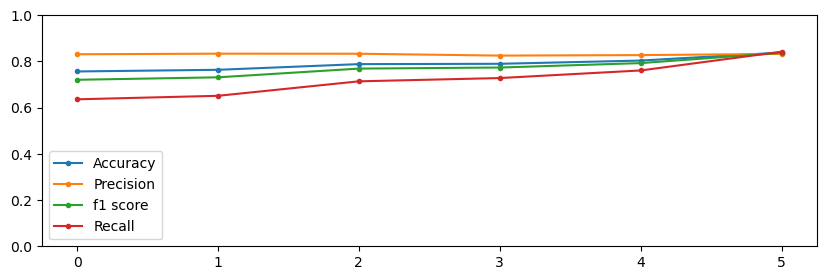

In [18]:
nbc_bow_models = []

for i, pos in enumerate(pos_data):
    #print(i)
    pos_labels = np.ones(pos.shape[0])
    neg_labels = np.zeros(neg.shape[0])
    y = np.hstack((pos_labels, neg_labels))
    x = sparse.vstack((pos, neg))
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 50)
    
    model = gen_nbc_model(X_train, y_train)
    nbc_bow_models.append(model)
    mod_file = r'Models/NBC/NBC_'+str(i)+'.model'
    pickle.dump(model, open(mod_file, 'wb'))

evaluate_metrics("TF-IDF-NBC", nbc_bow_models, X_test, y_test)

### Logistic regression model one vs all

C:\Users\gyank\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gyank\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Scores for : TF-IDF-LR
      Model no  Accuracy  Precision  f1 score    Recall
0  TF-IDF-LR-0  0.811903   0.853922  0.795073  0.743813
1  TF-IDF-LR-1  0.820877   0.861372  0.805614  0.756636
2  TF-IDF-LR-2  0.826552   0.856563  0.814543  0.776453
3  TF-IDF-LR-3  0.831874   0.858611  0.821168  0.786854
4  TF-IDF-LR-4  0.838693   0.856259  0.830678  0.806582
5  TF-IDF-LR-5  0.871376   0.871300  0.868478  0.865674
6          Avg  0.871376   0.871300  0.868478  0.865674


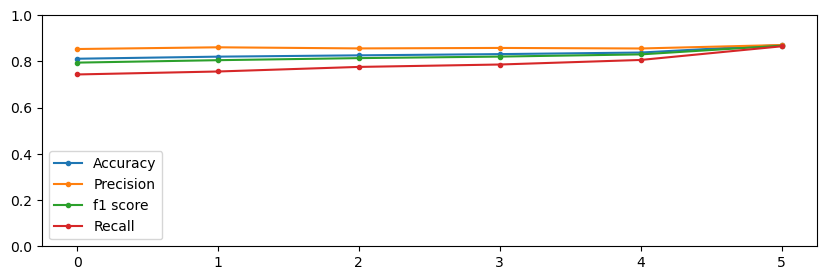

In [8]:
lr_bow_models = []
for i, pos in enumerate(pos_data):
    #print(i)
    pos_labels = np.ones(pos.shape[0])
    neg_labels = np.zeros(neg.shape[0])
    y = np.hstack((pos_labels, neg_labels))
    x = sparse.vstack((pos, neg))
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
    
    
    model = logistic_regression(X_train, y_train)
    lr_bow_models.append(model)
    mod_file = r'Models/LR/LR_'+str(i)+'.model'
    pickle.dump(model, open(mod_file, 'wb'))
    
evaluate_metrics("TF-IDF-LR", lr_bow_models, X_test, y_test)

### SVM model one vs all

In [20]:
svm_bow_models = []
for i, pos in enumerate(pos_data):
    #print(i)
    pos_labels = np.ones(pos.shape[0])
    neg_labels = np.zeros(neg.shape[0])
    y = np.hstack((pos_labels, neg_labels))
    x = sparse.vstack((pos, neg))
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
    
    
    model = gen_svm_model(X_train, y_train)
    lr_bow_models.append(model)
    mod_file = r'Models/SVM/SVM_'+str(i)+'.model'
    pickle.dump(model, open(mod_file, 'wb'))


******

In [21]:
evaluate_metrics("TF-IDF-SVM", svm_bow_models, X_test, y_test)

Scores for : TF-IDF-SVM


TypeError: no numeric data to plot